___
# Linear Regression - Exercise

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
df=pd.read_csv('Ecommerce Customers')
df.head()
pd.value_counts(df['Avatar'])
len(np.unique(df['Avatar']))

138

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [33]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


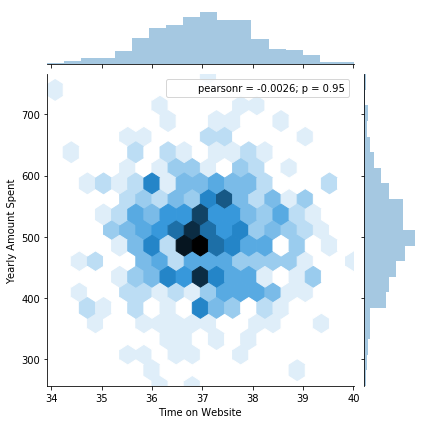

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind="hex")

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


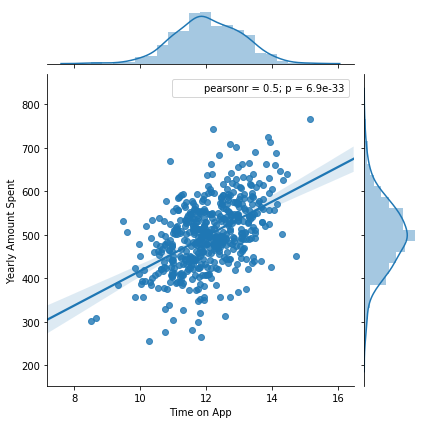

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,kind="reg")   #kind="reg" with regression

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


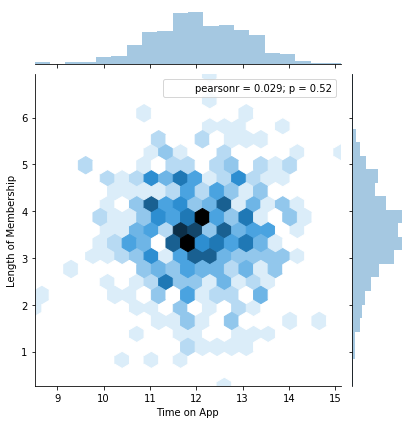

In [11]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind="hex")

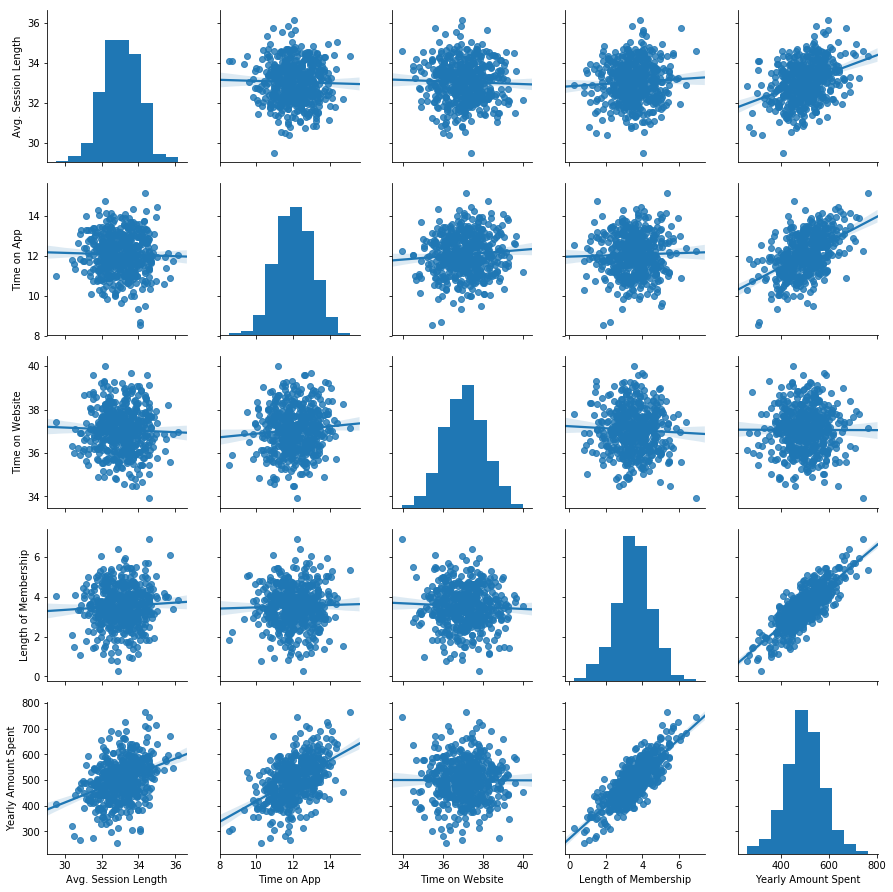

In [31]:
sns.pairplot(df,kind='reg')

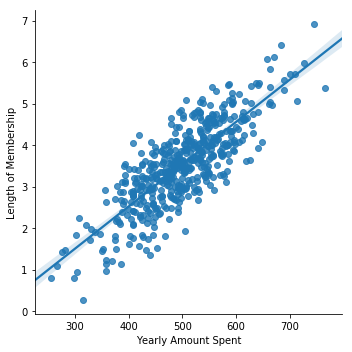

In [32]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=df)

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


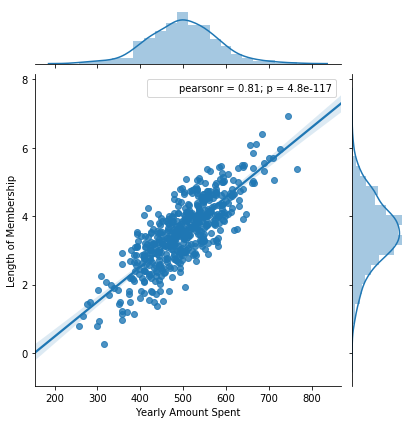

In [35]:
sns.jointplot(x='Yearly Amount Spent', y='Length of Membership', data=df,kind='reg')

## Training and Testing Data

In [72]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [73]:
#X=df.index.values


In [160]:
Y=df['Yearly Amount Spent']


In [161]:
dg=df.reset_index()
X=df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [99]:
dg.head()

,index,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Training the Model

In [163]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()


In [164]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Print out the coefficients of the model**

In [165]:
print(lm.intercept_)

-1047.9327822502385


In [166]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


In [167]:
print(lm.score(X_train,Y_train))

0.9817562058732432


In [168]:
yhat = lm.predict(X_train)

In [169]:
np.sum((Y_train-yhat)**2.0)

37397.98101299997

In [170]:
yhat = lm.predict(X_train)
SS_Residual = np.sum((Y_train-yhat)**2)
SS_Total = np.sum((Y_train-np.mean(Y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
print(r_squared)    # 0.9181223200568411 same as  lm.score(X_train,Y_train)

0.9817562058732432


## Predicting Test Data

In [171]:
Y_predict=lm.predict(X_test)
yhat = lm.predict(X_train)  #train
#Y_predict

In [172]:
SS_Residual = np.sum((Y_test-Y_predict)**2)
SS_Total = np.sum((Y_test-np.mean(Y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
print(r_squared)

0.9890046246741234


In [173]:
print(lm.score(X_test,Y_test))

0.9890046246741234


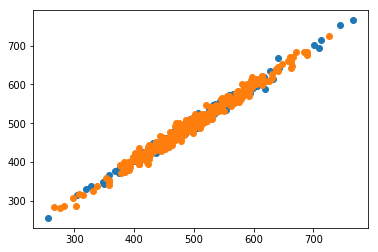

In [174]:
plt.scatter(Y_test,Y_predict)   #test vs. predict test
plt.scatter(Y_train,yhat)      #train vs. predict train


## Evaluating the Model

In [175]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(Y_test,Y_predict))
print('MSE', metrics.mean_squared_error(Y_test,Y_predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

MAE 7.228148653430838
MSE 79.81305165097461
RMSE 8.933815066978642


## Residuals

C:\Users\niava\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


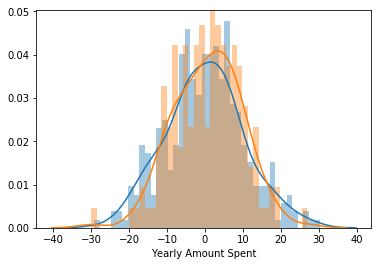

In [176]:
sns.distplot((yhat-Y_train), bins=40)
sns.distplot((Y_predict-Y_test), bins=40)

In [179]:
coeff_df=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
np.shape(lm.coef_)
coeff_df

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
